In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [12]:
music_effect_path = ('https://raw.githubusercontent.com/denisem77/PROJECT-3-/main/Resources/music_meds.csv')

music_metadata = pd.read_csv(music_effect_path)

music_metadata

,id,age,hours_per_day,while_working,frequency_classical,frequency_country,frequency_edm,frequency_folk,frequency_gospel,frequency_hip_hop,...,frequency_pop,frequency_r_b,frequency_rap,frequency_rock,frequency_video_game_music,anxiety,depression,insomnia,ocd,music_effects
0,1,18,4.0,No,Never,Never,Very frequently,Never,Never,Rarely,...,Rarely,Never,Rarely,Rarely,Very frequently,7,7,10,2,No effect
1,2,61,2.5,Yes,Sometimes,Never,Never,Rarely,Sometimes,Never,...,Sometimes,Sometimes,Never,Never,Never,9,7,3,3,Improve
2,3,18,4.0,Yes,Never,Never,Rarely,Never,Rarely,Very frequently,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7,2,5,9,Improve
3,4,18,5.0,Yes,Rarely,Sometimes,Never,Never,Never,Sometimes,...,Very frequently,Very frequently,Very frequently,Very frequently,Never,8,8,7,7,Improve
4,5,18,3.0,Yes,Sometimes,Never,Rarely,Sometimes,Rarely,Rarely,...,Rarely,Rarely,Never,Never,Sometimes,4,8,6,0,Improve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,612,17,2.0,Yes,Very frequently,Rarely,Never,Sometimes,Never,Sometimes,...,Very frequently,Never,Rarely,Very frequently,Never,7,6,0,9,Improve
612,613,18,1.0,Yes,Rarely,Rarely,Never,Never,Never,Never,...,Very frequently,Never,Never,Sometimes,Sometimes,3,2,2,5,Improve
613,614,19,6.0,Yes,Rarely,Sometimes,Sometimes,Rarely,Rarely,Very frequently,...,Sometimes,Sometimes,Sometimes,Rarely,Rarely,2,2,2,2,Improve
614,615,19,5.0,Yes,Very frequently,Never,Never,Never,Never,Never,...,Never,Never,Never,Never,Sometimes,2,3,2,1,Improve


/var/folders/59/4v7frb591195wg_tyn0flbzm0000gn/T/ipykernel_43607/2378381347.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_mood_improved = df_mood_improved.groupby('age_group').size()
/var/folders/59/4v7frb591195wg_tyn0flbzm0000gn/T/ipykernel_43607/2378381347.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_group_mood_improved.index, y=age_group_mood_improved.values, palette="viridis")


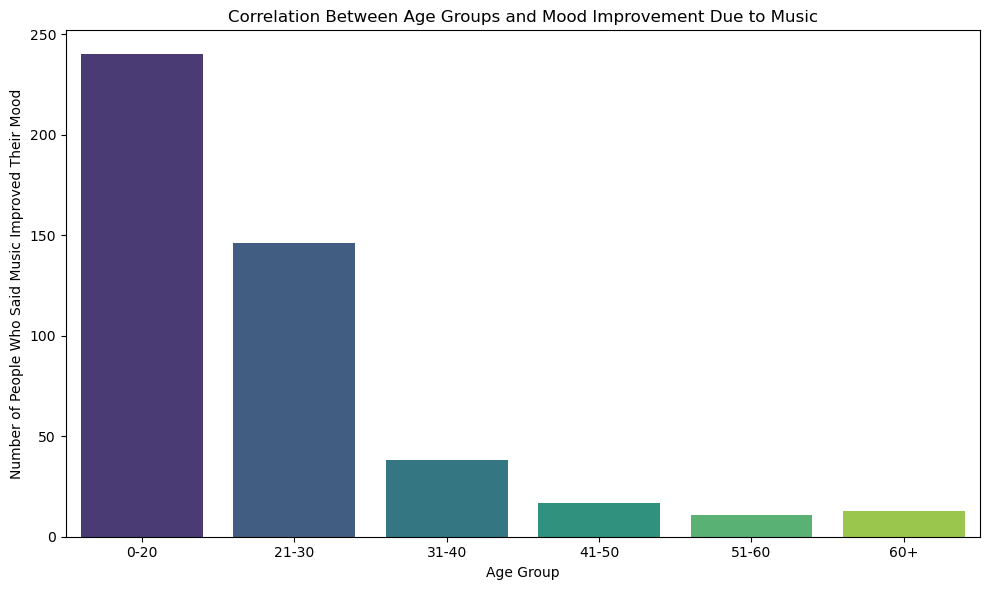

In [6]:
#Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/denisem77/PROJECT-3-/main/Resources/music_meds.csv')

# Step 1: Create age groups
bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '60+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

# Step 2: Filter for rows where music had a positive effect
# We assume 'improves' in the 'music_effects' column indicates improvement in mood.
df_mood_improved = df[df['music_effects'] == 'Improve']

# Step 3: Group by age group and count how many people in each group said music improved their mood
age_group_mood_improved = df_mood_improved.groupby('age_group').size()

# Step 4: Plot the data
plt.figure(figsize=(10,6))
sns.barplot(x=age_group_mood_improved.index, y=age_group_mood_improved.values, palette="viridis")

# Add labels and title
plt.title('Correlation Between Age Groups and Mood Improvement Due to Music')
plt.xlabel('Age Group')
plt.ylabel('Number of People Who Said Music Improved Their Mood')

# Show the plot
plt.tight_layout()
plt.savefig('age_group_and_mood.png')
plt.show()
# Create a new dataframe with the data you want to plot
plot_data = pd.DataFrame({
    'hours_per_day': df['hours_per_day'].tolist() * 2,
    'mental_health_outcome': df['anxiety'].tolist() + df['depression'].tolist(),
    'condition': ['Anxiety'] * len(df) + ['Depression'] * len(df)
})



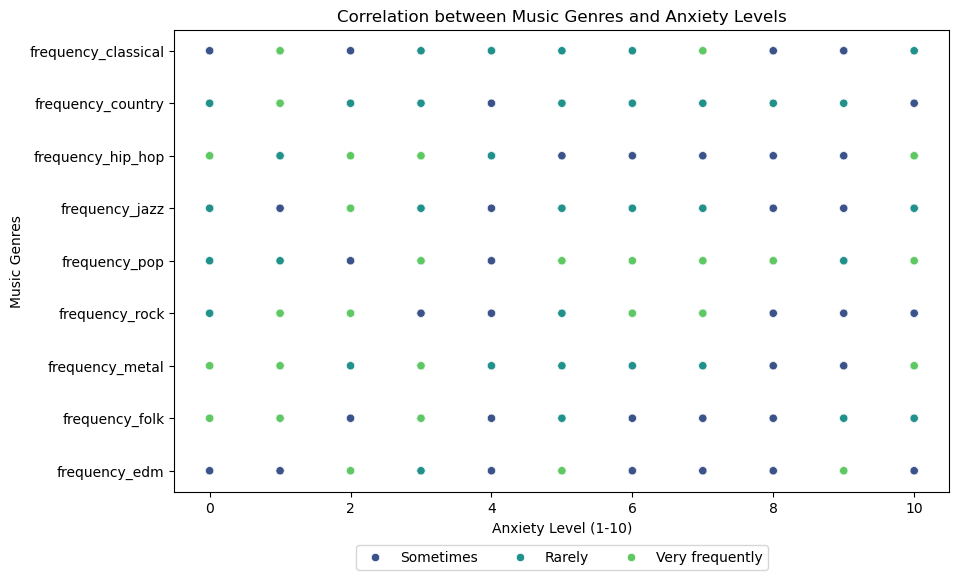

In [5]:
# Select the relevant columns: anxiety and the different music genres
genre_columns = ['frequency_classical', 'frequency_country', 'frequency_hip_hop', 'frequency_jazz', 
                 'frequency_pop', 'frequency_rock', 'frequency_metal', 'frequency_folk', 'frequency_edm']

# Melt the data to get a long format where genres are in one column
melted_df = pd.melt(df, id_vars=['anxiety'], value_vars=genre_columns, 
                    var_name='genre', value_name='frequency')

# Remove rows where frequency is 'Never' (optional, depending on what you want)
melted_df = melted_df[melted_df['frequency'] != 'Never']

# Plot a scatter plot with genres on the y-axis and anxiety on the x-axis
plt.figure(figsize=(10,6))
sns.scatterplot(x='anxiety', y='genre', data=melted_df, hue='frequency', palette='viridis')

# Move the legend to the bottom (x-axis)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)

# Add title and labels
plt.title('Correlation between Music Genres and Anxiety Levels')
plt.xlabel('Anxiety Level (1-10)')
plt.ylabel('Music Genres')

# Save the plot as a PNG image
plt.savefig('music_anxiety_plot.png')

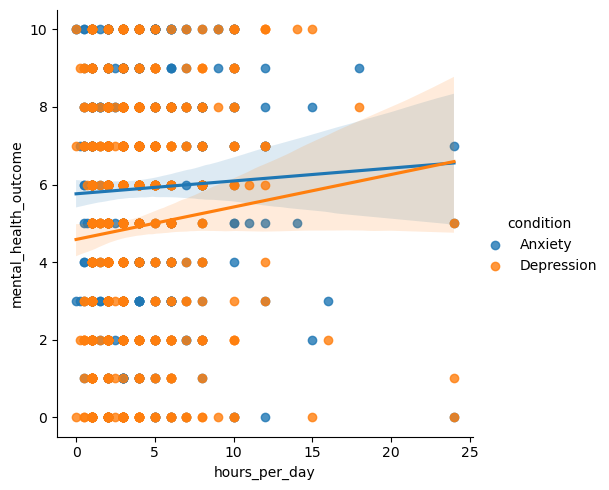

In [8]:
# Use Seaborn's lmplot function to create the plot and assign it to a variable
lm_plot = sns.lmplot(x='hours_per_day', y='mental_health_outcome', data=plot_data, hue='condition')

# Save the plot as a PNG image
lm_plot.savefig('mental_health_vs_hours.png')

# Show the plot and save as a png file
plt.savefig('Mental_Health_vs_Hours.png')
plt.show()


